In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data= pd.read_csv("drive/MyDrive/Colab Notebooks/Final_Year_Project/FakeAVCeleb_v1.2/meta_data.csv")

In [ ]:
data.head()
del data["source"]
del data["target1"]
del data["target2"]
del data["method"]
del data["category"]
del data["race"]
del data["path"]
del data["gender"]
data.head()

num_rows=len(data)
file_names = []
replace_dict = {
    "RealVideo-RealAudio": 3,
    "RealVideo-FakeAudio": 2,
    "FakeVideo-RealAudio": 1,
    "FakeVideo-FakeAudio": 0
}
for i in range(num_rows):
    temp = data["file_path"][i]
    file_names.append(f"{temp}/videoNo_{i}")
    data['type'].replace(replace_dict, inplace=True)

data["file_names"] = file_names
del data["file_path"]

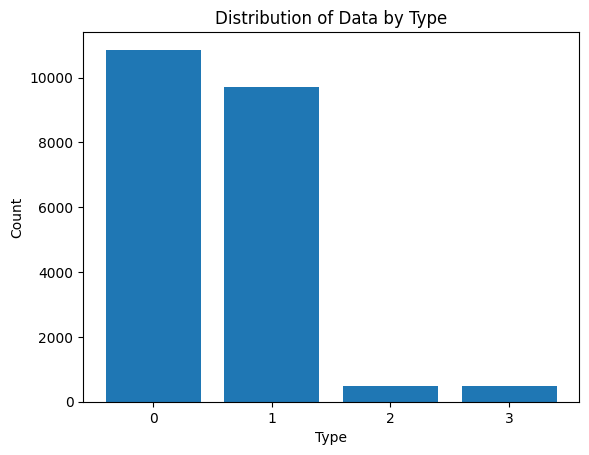

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

labels = [0, 1, 2, 3]
value_counts = data['type'].value_counts()
plt.bar (labels, value_counts)

# Add the labels on the x-axis
plt.xticks (labels)
plt.title('Distribution of Data by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
video_label = []
audio_label = []

for file_name in data['file_names']:
    if 'RealVideo' in file_name:
        video_label.append(1)
    elif 'FakeVideo' in file_name:
        video_label.append(0)

    if 'RealAudio' in file_name:
        audio_label.append(1)
    elif 'FakeAudio' in file_name:
        audio_label.append(0)
data["video_label"]=video_label
data["audio_label"]=audio_label
data.head()

,type,file_names,video_label,audio_label
0,3,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,1,1
1,3,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,1,1
2,3,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,1,1
3,3,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,1,1
4,3,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,1,1


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
train_ratio=0.8
split_index = int(len(data)*train_ratio)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [ ]:
import os
import cv2
import torch
from torch.utils.data import Dataset
import numpy as np
batch_size = 1

In [ ]:
type_0_data = train_data[train_data['type'] == 0].head(500)
type_1_data = train_data[train_data['type'] == 1].head(500)
final_data = pd.concat([type_0_data, type_1_data, train_data[train_data['type'].isin([2, 3])]])
train_data = final_data

type_0_data = test_data[test_data['type'] == 0].head(100)
type_1_data = test_data[test_data['type'] == 1].head(100)
final_data = pd.concat([type_0_data, type_1_data, test_data[test_data['type'].isin([2, 3])]])
test_data = final_data

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.3 MB/s eta 0:00:00


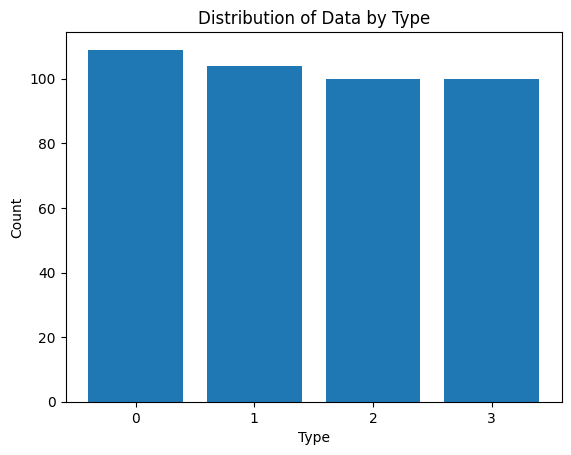

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

labels = [0, 1, 2, 3]
value_counts = test_data['type'].value_counts()
plt.bar (labels, value_counts)

# Add the labels on the x-axis
plt.xticks (labels)
plt.title('Distribution of Data by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Assuming train_data is your DataFrame
shuffled_data = shuffle(train_data)

# Reset the index of the shuffled DataFrame
shuffled_data.reset_index(drop=True, inplace=True)
train_data = shuffled_data
train_data

,type,file_names,video_label,audio_label
0,3,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,1,1
1,1,FakeAVCeleb/FakeVideo-RealAudio/African/women/...,0,1
2,1,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Eur...,0,1
3,0,FakeAVCeleb/FakeVideo-FakeAudio/Caucasian (Ame...,0,0
4,2,FakeAVCeleb/RealVideo-FakeAudio/Caucasian (Ame...,1,0
...,...,...,...,...
1782,2,FakeAVCeleb/RealVideo-FakeAudio/African/women/...,1,0
1783,0,FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/...,0,0
1784,1,FakeAVCeleb/FakeVideo-RealAudio/Asian (South)/...,0,1
1785,0,FakeAVCeleb/FakeVideo-FakeAudio/Caucasian (Ame...,0,0


In [ ]:
from transformers import AutoImageProcessor, SwinModel
import time

base_frame_path = "drive/MyDrive/Colab Notebooks/Final_Year_Project/output_faces/"
base_mel_path = "drive/MyDrive/Colab Notebooks/Final_Year_Project/output_audios_melspectogram/"
image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")


class CustomDataset(Dataset):
    def __init__(self, data_paths):
        self.data_paths = data_paths

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        folder_path = self.data_paths["file_names"][idx]
        frames,mel = self.load_frames(folder_path)
        labels = [0,0,0,0]
        labels[self.data_paths["type"][idx]] = 1
        # print(frames)
        # return torch.tensor(frames), torch.tensor(mel), [self.data_paths["type"][idx],self.data_paths["video_label"][idx],self.data_paths["audio_label"][idx]]
        return frames, mel, torch.tensor(np.array(labels, dtype=np.float32))

    def load_frames(self, folder_path):
        frames = []
        # start = time.time()

        for frame_file in os.listdir(base_frame_path+folder_path):
            if frame_file.endswith('.jpg') or frame_file.endswith('.png'):
                frame_path = os.path.join(base_frame_path+folder_path, frame_file)
                frame = cv2.imread(frame_path)
                frame = image_processor(frame, return_tensors="pt")
                frames.append(frame)

        mel_path = base_mel_path + folder_path + ".png"
        mel = cv2.imread(mel_path)
        mel = image_processor(mel, return_tensors="pt")

        # end = time.time()
        # print("Time for preprocessing : ", start-end)

        return frames, mel

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
from torch.utils.data import DataLoader





In [ ]:
import torch
import torch.nn as nn
from torchvision.models import swin_transformer

vis_model =  SwinModel.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
aud_model =  SwinModel.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

# print(swin_transformer.swin_b())

# vis_model = nn.Sequential(*list(vis_model.children())[:-1])
# aud_model = nn.Sequential(*list(aud_model.children())[:-1])
# nn.Conv2d(3, 128, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# vis_model[0][0][0] = nn.Conv2d(3, 128, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# print(vis_model)
# Move the model to the appropriate device (CPU or GPU)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# vis_model.to(device)
# aud_model.to(device)

In [ ]:
# freezing the pretrained models

for param in aud_model.parameters():
    param.requires_grad = False

for param in vis_model.parameters():
    param.requires_grad = False


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AudioAndVideoConcat(nn.Module):
    def __init__(self, video_module, audio_module, num_classes):

        super(AudioAndVideoConcat, self).__init__()

        self.video_module = video_module
        self.audio_module = audio_module
        self.fusion = torch.nn.Linear(in_features=4096*2,out_features=4096)
        self.reduce_lay = torch.nn.Linear(in_features=49*768,out_features=4096)
        self.fc = torch.nn.Linear(in_features=4096,out_features=num_classes)
        self.dropout = torch.nn.Dropout(0.8)
        self.fc = nn.Linear(4096, num_classes)  # Concatenating features

        # self.convolutional_layer = torch.nn.Conv1d(in_channels=49, out_channels=32, kernel_size=3, padding=1)

    def forward(self, video_frames, mel_spectogram):
        # video_features.last_hidden_state = torch.zeros(1, 49, 768)


        # for i in range(1 if len(video_frames)-1 == 0 else len(video_frames)-1):
        for i in range(len(video_frames)):
          with torch.no_grad():
            swin_vid_features = self.video_module(**video_frames[i]).last_hidden_state
          video_features = torch.nn.functional.relu(self.reduce_lay(swin_vid_features.view(1,-1)))

        with torch.no_grad():
          swin_aud_features = self.audio_module(**mel_spectogram).last_hidden_state
        audio_features = torch.nn.functional.relu(self.reduce_lay(swin_aud_features.view(1,-1)))

        # print(video_features.shape,audio_features.shape)
        # flattened_video_features = torch.nn.functional.max_pool1d(self.convolutional_layer(video_features.last_hidden_state), kernel_size=32, stride=32)
        # flattened_audio_features = torch.nn.functional.max_pool1d(self.convolutional_layer(audio_features.last_hidden_state), kernel_size=32, stride=32)
        # # print("pjhbhbh",flattened_video_features.shape)
        # flattened_video_features = flattened_video_features.view(1, 768)
        # flattened_audio_features = flattened_audio_features.view(1, 768)
        # print(flattened_video_features.shape, flattened_audio_features.shape)
        # flattened_video_features = video_features.view(1, 37632)
        # flattened_audio_features = audio_features.view(1, 37632)
        # print(video_features.shape, audio_features.shape)

        concatenated_features = torch.cat((video_features, audio_features), dim=1)  # Concatenating features
        fused = self.dropout(torch.nn.functional.relu(self.fusion(concatenated_features)))
        output = self.fc(fused)
        softmax_output = F.softmax(output)


        return softmax_output

In [ ]:
num_classes = 4  # Specify the number of classes in your task
multimodal_model = AudioAndVideoConcat(vis_model, aud_model, num_classes)
optimizer = torch.optim.Adam(multimodal_model.parameters(), lr=0.000005,betas=(0.9, 0.999))
criterion = nn.CrossEntropyLoss()

In [ ]:
#reduction
train_dataset = CustomDataset(train_data)
test_dataset = CustomDataset(test_data)

In [ ]:
num_epochs = 10
print(len(train_data),len(test_data))

for epoch in range(num_epochs):
    for bth_idx in range(748,len(train_data)):
          # Forward pass
          start = time.time()
          frames,mel,labels = train_dataset.__getitem__(bth_idx)
          end = time.time()

          print("Time for preprocessing : ", end-start)


          if len(frames) != 0 :

              start = time.time()
              outputs = multimodal_model(frames, mel)
              end = time.time()

              print("Time for training : ", end-start)

              labels = torch.unsqueeze(labels, dim=0)
              print(outputs,labels)
              loss = criterion(outputs, labels)
              print("Index = ",bth_idx," Loss = ",loss)
              # Backward pass and optimization

              start = time.time()
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()
              end = time.time()

              print("Time for optimisation : ",  end-start)

              # check point
              if bth_idx%100 == 0 :
                  checkpoint = {
                      'epoch': epoch,
                      'model_state_dict': multimodal_model.state_dict(),
                      'optimizer_state_dict': optimizer.state_dict(),
                      'loss': loss,
                      'bth_idx':bth_idx,
                      'train_data' : train_data,
                      'test_data':test_data
                  }
                  torch.save(checkpoint, 'drive/MyDrive/Colab Notebooks/Final_Year_Project/model_reduced_dataset_checkpoint.pth')


    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


1810 390
Time for preprocessing :  6.771913528442383


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


Time for training :  3.9692165851593018
tensor([[0.2923, 0.2828, 0.2680, 0.1568]], grad_fn=<SoftmaxBackward0>) tensor([[0., 1., 0., 0.]])
Index =  748  Loss =  tensor(1.3549, grad_fn=<DivBackward1>)


KeyboardInterrupt: ignored

In [2]:
import torch
checkpoint = torch.load('drive/MyDrive/Colab Notebooks/Final_Year_Project/model_reduced_dataset_checkpoint.pth')


1788 412 7 400


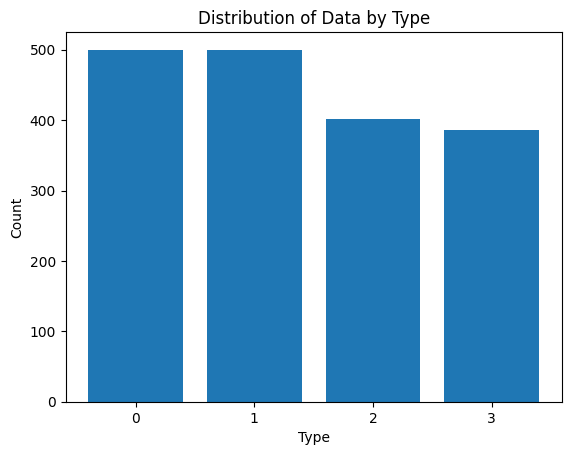

,level_0,index,type,file_names,video_label,audio_label
0,0,17253,0,FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/...,0,0
1,1,17256,0,FakeAVCeleb/FakeVideo-FakeAudio/Asian (East)/w...,0,0
2,2,17257,0,FakeAVCeleb/FakeVideo-FakeAudio/Caucasian (Ame...,0,0
3,3,17258,0,FakeAVCeleb/FakeVideo-FakeAudio/Caucasian (Eur...,0,0
4,4,17260,0,FakeAVCeleb/FakeVideo-FakeAudio/Caucasian (Ame...,0,0


In [6]:
num_epochs = 10
last_epoch = checkpoint['epoch']
last_index = checkpoint['bth_idx']
multimodal_model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
loss = checkpoint['loss']
train_data = checkpoint['train_data']
test_data = checkpoint['test_data']
print(len(train_data),len(test_data),last_epoch, last_index)
# test_data = test_data.reset_index()


train_dataset = CustomDataset(train_data)
test_dataset = CustomDataset(test_data)

import pandas as pd
import matplotlib.pyplot as plt

labels = [0, 1, 2, 3]
value_counts = test_data['type'].value_counts()
plt.bar (labels, value_counts)

# Add the labels on the x-axis
plt.xticks (labels)
plt.title('Distribution of Data by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

test_data.head()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
for epoch in range(last_epoch,num_epochs):
    running_loss = 0.0
    print("Epoch no. ",epoch)
    all_labels = []
    all_preds = []
    for bth_idx in range(last_index+1,len(train_data)):
          # Forward pass
          start = time.time()
          frames,mel,labels = train_dataset.__getitem__(bth_idx)
          end = time.time()

          print("Time for preprocessing : ", end-start)


          if len(frames) != 0 :

              start = time.time()
              outputs = multimodal_model(frames, mel)
              end = time.time()

              print("Time for training : ", end-start)
              labels = torch.unsqueeze(labels, dim=0)
              print(outputs,labels)
              loss = criterion(outputs, labels)
              print("Index = ",bth_idx," Loss = ",loss)
              # Backward pass and optimization

              start = time.time()
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()
              running_loss += loss.item()
              end = time.time()
              print("Time for optimisation : ",  end-start)
              _, preds1 = torch.max(outputs, 1)
              _, preds2 = torch.max(labels, 1)
              all_labels.extend(preds2.cpu().numpy())
              all_preds.extend(preds1.cpu().numpy())
              # check point
              if bth_idx%100 == 0 :
                  accuracy = accuracy_score(all_labels, all_preds)
                  print(f'Epoch {epoch}/{num_epochs},Training Accuracy: {accuracy}')
                  checkpoint = {
                      'epoch': epoch,
                      'model_state_dict': multimodal_model.state_dict(),
                      'optimizer_state_dict': optimizer.state_dict(),
                      'loss': loss,
                      'bth_idx':bth_idx,
                      'train_data' : train_data,
                      'test_data':test_data
                  }
                  torch.save(checkpoint, 'drive/MyDrive/Colab Notebooks/Final_Year_Project/model_reduced_dataset_checkpoint.pth')

    last_index = -1
    checkpoint = {
        'epoch': epoch+1,
        'model_state_dict': multimodal_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss,
        'bth_idx':last_index,
        'train_data' : train_data,
        'test_data':test_data
    }
    torch.save(checkpoint, f'drive/MyDrive/Colab Notebooks/Final_Year_Project/model_reduced_dataset_checkpoint_{epoch}.pth')

Epoch no.  7
Time for preprocessing :  0.11707830429077148


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


Time for training :  2.686042547225952
tensor([[1.7161e-08, 9.9974e-01, 3.3089e-11, 2.5724e-04]],
       grad_fn=<SoftmaxBackward0>) tensor([[0., 1., 0., 0.]])
Index =  101  Loss =  tensor(0.7438, grad_fn=<DivBackward1>)
Time for optimisation :  5.339745283126831
Time for preprocessing :  0.15489721298217773
Time for training :  2.9744350910186768
tensor([[1.8750e-05, 9.9998e-01, 1.0587e-11, 2.6224e-07]],
       grad_fn=<SoftmaxBackward0>) tensor([[0., 1., 0., 0.]])
Index =  102  Loss =  tensor(0.7437, grad_fn=<DivBackward1>)
Time for optimisation :  5.279607772827148
Time for preprocessing :  0.07116484642028809
Time for training :  1.7482929229736328
tensor([[2.0678e-03, 2.6465e-10, 9.9793e-01, 4.2426e-06]],
       grad_fn=<SoftmaxBackward0>) tensor([[0., 0., 1., 0.]])
Index =  103  Loss =  tensor(0.7451, grad_fn=<DivBackward1>)
Time for optimisation :  4.27945876121521
Time for preprocessing :  0.0800333023071289
Time for training :  1.871983289718628
tensor([[6.9975e-08, 8.6767e-03

<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


Time for training :  2.84302020072937
tensor([[6.8328e-03, 1.5102e-07, 9.9317e-01, 1.6234e-06]],
       grad_fn=<SoftmaxBackward0>) tensor([[0., 0., 1., 0.]])
Index =  201  Loss =  tensor(0.7485, grad_fn=<DivBackward1>)
Time for optimisation :  5.605087041854858
Time for preprocessing :  0.0859076976776123
Time for training :  2.679757833480835
tensor([[2.8090e-03, 9.4848e-01, 9.9618e-05, 4.8614e-02]],
       grad_fn=<SoftmaxBackward0>) tensor([[0., 1., 0., 0.]])
Index =  202  Loss =  tensor(0.7804, grad_fn=<DivBackward1>)
Time for optimisation :  8.308940410614014
Time for preprocessing :  0.1522693634033203
Time for preprocessing :  0.47844648361206055
Time for training :  5.492363214492798
tensor([[9.9997e-01, 1.1790e-05, 1.9839e-05, 2.7353e-09]],
       grad_fn=<SoftmaxBackward0>) tensor([[1., 0., 0., 0.]])
Index =  204  Loss =  tensor(0.7437, grad_fn=<DivBackward1>)
Time for optimisation :  6.382918119430542
Time for preprocessing :  0.24578428268432617
Time for training :  3.5216

<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


Time for training :  2.03256893157959
tensor([[1.0000e+00, 9.9773e-07, 7.2065e-09, 2.8256e-13]],
       grad_fn=<SoftmaxBackward0>) tensor([[1., 0., 0., 0.]])
Index =  301  Loss =  tensor(0.7437, grad_fn=<DivBackward1>)
Time for optimisation :  4.41406774520874
Time for preprocessing :  2.3811473846435547
Time for training :  3.8213083744049072
tensor([[1.6802e-04, 2.1555e-02, 5.5822e-03, 9.7269e-01]],
       grad_fn=<SoftmaxBackward0>) tensor([[0., 0., 0., 1.]])
Index =  302  Loss =  tensor(0.7630, grad_fn=<DivBackward1>)
Time for optimisation :  10.474652290344238
Time for preprocessing :  1.6172740459442139
Time for training :  1.3484625816345215
tensor([[9.9841e-01, 1.0362e-03, 5.5583e-04, 1.6722e-09]],
       grad_fn=<SoftmaxBackward0>) tensor([[1., 0., 0., 0.]])
Index =  303  Loss =  tensor(0.7448, grad_fn=<DivBackward1>)
Time for optimisation :  5.001614809036255
Time for preprocessing :  2.3829989433288574
Time for training :  7.146835803985596
tensor([[9.9844e-06, 9.9959e-01, 

<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


Time for training :  1.3574535846710205
tensor([[9.9953e-01, 1.2043e-07, 4.6614e-04, 1.8807e-09]],
       grad_fn=<SoftmaxBackward0>) tensor([[1., 0., 0., 0.]])
Index =  401  Loss =  tensor(0.7440, grad_fn=<DivBackward1>)


KeyboardInterrupt: ignored

In [ ]:

    from sklearn.metrics import roc_auc_score, accuracy_score

    multimodal_model.eval()  # Set the multimodal_model to evaluation mode
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for bth_idx in range(0,len(test_data)):
            frames,mel,labels = test_dataset.__getitem__(bth_idx)
            if len(frames) != 0 :
              outputs = multimodal_model(frames,mel)
              labels = torch.unsqueeze(labels, dim=0)
              _, preds1 = torch.max(outputs, 1)
              _, preds2 = torch.max(labels, 1)
              all_labels.extend(preds2.cpu().numpy())
              all_preds.extend(preds1.cpu().numpy())
              accuracy = accuracy_score(all_labels, all_preds)
              print(bth_idx, accuracy)
    accuracy = accuracy_score(all_labels, all_preds)

    print(f'Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy}')

<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


0 0.0


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


1 0.5


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


2 0.6666666666666666


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


3 0.75


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


4 0.6


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


5 0.6666666666666666


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


6 0.5714285714285714


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


7 0.625


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


8 0.6666666666666666


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


9 0.7


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


10 0.7272727272727273


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


11 0.75


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


12 0.7692307692307693


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


13 0.7142857142857143


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


14 0.7333333333333333


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


15 0.75


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


16 0.7647058823529411


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


17 0.7777777777777778


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


18 0.7894736842105263


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


19 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


20 0.7619047619047619


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


21 0.7727272727272727


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


22 0.782608695652174


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


23 0.75


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


24 0.76


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


25 0.7692307692307693


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


26 0.7777777777777778


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


27 0.7857142857142857


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


28 0.7931034482758621


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


29 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


30 0.7741935483870968


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


31 0.78125


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


32 0.7575757575757576


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


33 0.7647058823529411


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


34 0.7714285714285715


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


35 0.7777777777777778


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


36 0.7837837837837838


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


37 0.7894736842105263


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


38 0.7948717948717948


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


39 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


40 0.8048780487804879


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


41 0.8095238095238095


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


42 0.7906976744186046


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


43 0.7954545454545454


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


44 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


45 0.8043478260869565


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


46 0.8085106382978723


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


47 0.8125


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


48 0.8163265306122449


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


49 0.82


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


50 0.8235294117647058


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


51 0.8076923076923077


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


52 0.8113207547169812


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


53 0.7962962962962963


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


54 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


55 0.7857142857142857


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


56 0.7894736842105263


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


57 0.7758620689655172


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


58 0.7796610169491526


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


59 0.7833333333333333


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


60 0.7868852459016393


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


61 0.7903225806451613


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


62 0.7936507936507936


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


63 0.796875


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


64 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


65 0.7878787878787878


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


66 0.7761194029850746


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


67 0.7794117647058824


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


68 0.782608695652174


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


69 0.7714285714285715


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


70 0.7746478873239436


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


71 0.7777777777777778


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


72 0.7808219178082192


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


73 0.7837837837837838


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


74 0.7866666666666666


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


75 0.7894736842105263


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


76 0.7792207792207793


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


77 0.782051282051282


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


78 0.7848101265822784


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


79 0.775


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


80 0.7777777777777778


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


81 0.7804878048780488


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


82 0.7831325301204819


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


83 0.7857142857142857


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


84 0.7764705882352941


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


85 0.7790697674418605


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


86 0.7816091954022989


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


87 0.7727272727272727


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


88 0.7640449438202247


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


89 0.7666666666666667


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


90 0.7582417582417582


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


91 0.7608695652173914


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


92 0.7634408602150538


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


93 0.7553191489361702


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


94 0.7578947368421053


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


95 0.75


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


96 0.7422680412371134


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


97 0.7346938775510204


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


98 0.7373737373737373


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


99 0.74


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


100 0.7425742574257426


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


101 0.7352941176470589


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


102 0.7378640776699029


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


103 0.7403846153846154


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


104 0.7333333333333333


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


105 0.7358490566037735


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


106 0.7383177570093458


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


107 0.7314814814814815


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


108 0.7339449541284404


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


109 0.7363636363636363


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


110 0.7387387387387387


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


111 0.7321428571428571


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


112 0.7345132743362832


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


113 0.7280701754385965


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


114 0.7304347826086957


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


115 0.7241379310344828


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


116 0.7264957264957265


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


117 0.7203389830508474


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


118 0.7226890756302521


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


119 0.7166666666666667


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


120 0.71900826446281


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


121 0.7213114754098361


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


122 0.7235772357723578


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


123 0.7258064516129032


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


124 0.72


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


125 0.7142857142857143


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


126 0.7086614173228346


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


127 0.7109375


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


128 0.7131782945736435


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


129 0.7153846153846154


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


130 0.7175572519083969


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


131 0.7121212121212122


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


132 0.7142857142857143


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


133 0.7164179104477612


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


134 0.7185185185185186


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


135 0.7205882352941176


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


136 0.7226277372262774


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


137 0.717391304347826


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


138 0.7194244604316546


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


139 0.7214285714285714


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


140 0.723404255319149


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


141 0.7253521126760564


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


142 0.7272727272727273


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


143 0.7291666666666666


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


144 0.7310344827586207


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


145 0.7328767123287672


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


146 0.7346938775510204


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


147 0.7364864864864865


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


148 0.7315436241610739


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


149 0.7333333333333333


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


150 0.7284768211920529


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


151 0.7236842105263158


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


152 0.7254901960784313


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


153 0.7272727272727273


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


154 0.7290322580645161


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


155 0.7307692307692307


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


156 0.732484076433121


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


157 0.7341772151898734


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


158 0.7295597484276729


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


159 0.73125


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


160 0.7329192546583851


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


161 0.7283950617283951


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


162 0.7239263803680982


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


163 0.725609756097561


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


164 0.7212121212121212


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


165 0.7228915662650602


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


166 0.7245508982035929


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


167 0.7261904761904762


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


168 0.727810650887574


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


169 0.7294117647058823


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


170 0.7309941520467836


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


171 0.7325581395348837


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


172 0.7283236994219653


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


173 0.7298850574712644


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


174 0.7314285714285714


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


175 0.7329545454545454


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


176 0.7288135593220338


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


177 0.7247191011235955


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


178 0.7262569832402235


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


179 0.7277777777777777


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


180 0.7292817679558011


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


181 0.7252747252747253


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


182 0.726775956284153


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


183 0.7282608695652174


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


184 0.7297297297297297


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


185 0.7258064516129032


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


186 0.7219251336898396


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


187 0.7180851063829787


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


188 0.7142857142857143


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


189 0.7157894736842105


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


190 0.7172774869109948


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


191 0.71875


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


192 0.7150259067357513


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


193 0.7164948453608248


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


194 0.7128205128205128


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


195 0.7142857142857143


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


196 0.7157360406091371


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


197 0.7171717171717171


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


198 0.7135678391959799


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


199 0.715


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


200 0.7164179104477612


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


201 0.7178217821782178


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


202 0.7192118226600985


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


203 0.7205882352941176


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


204 0.7219512195121951


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


205 0.7233009708737864


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


206 0.7246376811594203


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


207 0.7259615384615384


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


208 0.7272727272727273


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


209 0.7285714285714285


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


210 0.7298578199052133


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


211 0.7311320754716981


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


212 0.7323943661971831


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


213 0.7336448598130841


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


214 0.7348837209302326


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


215 0.7361111111111112


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


216 0.7373271889400922


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


217 0.7385321100917431


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


218 0.7397260273972602


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


219 0.740909090909091


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


220 0.7420814479638009


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


221 0.7432432432432432


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


222 0.7443946188340808


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


223 0.7455357142857143


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


224 0.7466666666666667


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


225 0.7477876106194691


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


226 0.748898678414097


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


227 0.75


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


228 0.7510917030567685


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


229 0.7521739130434782


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


230 0.7532467532467533


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


231 0.7543103448275862


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


232 0.7553648068669528


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


233 0.7564102564102564


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


234 0.7574468085106383


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


235 0.7584745762711864


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


236 0.759493670886076


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


237 0.7605042016806722


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


238 0.7615062761506276


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


239 0.7625


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


240 0.7634854771784232


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


241 0.7644628099173554


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


242 0.7654320987654321


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


243 0.7663934426229508


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


244 0.7673469387755102


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


245 0.7682926829268293


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


246 0.7692307692307693


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


247 0.7701612903225806


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


248 0.7710843373493976


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


249 0.772


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


250 0.7729083665338645


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


251 0.7738095238095238


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


252 0.7747035573122529


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


253 0.7755905511811023


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


254 0.7764705882352941


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


255 0.77734375


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


256 0.7782101167315175


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


257 0.7790697674418605


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


258 0.7799227799227799


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


259 0.7807692307692308


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


260 0.7816091954022989


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


261 0.7824427480916031


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


262 0.7832699619771863


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


263 0.7840909090909091


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


264 0.7849056603773585


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


265 0.7857142857142857


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


266 0.7865168539325843


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


267 0.7873134328358209


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


268 0.7881040892193308


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


269 0.7888888888888889


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


270 0.7896678966789668


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


271 0.7904411764705882


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


272 0.7912087912087912


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


273 0.791970802919708


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


274 0.7927272727272727


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


275 0.7934782608695652


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


276 0.7942238267148014


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


277 0.7949640287769785


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


278 0.7956989247311828


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


279 0.7928571428571428


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


280 0.7935943060498221


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


281 0.7907801418439716


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


282 0.7915194346289752


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


283 0.7922535211267606


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


284 0.7929824561403509


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


285 0.7937062937062938


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


286 0.794425087108014


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


287 0.7951388888888888


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


288 0.7958477508650519


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


289 0.7965517241379311


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


290 0.7972508591065293


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


291 0.797945205479452


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


292 0.7986348122866894


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


293 0.7993197278911565


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


294 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


295 0.8006756756756757


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


296 0.797979797979798


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


297 0.7986577181208053


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


298 0.7993311036789298


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


299 0.8


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


300 0.8006644518272426


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


301 0.8013245033112583


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


302 0.801980198019802


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


303 0.8026315789473685


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


304 0.8032786885245902


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


305 0.803921568627451


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


306 0.8045602605863192


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


307 0.8051948051948052


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


308 0.8058252427184466


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


309 0.8064516129032258


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


310 0.8070739549839229


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


311 0.8076923076923077


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


312 0.8083067092651757


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


313 0.8089171974522293


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


314 0.8095238095238095


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


315 0.810126582278481


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


316 0.8107255520504731


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


317 0.8113207547169812


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


319 0.8119122257053292


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


320 0.8125


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


321 0.8130841121495327


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


322 0.8136645962732919


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


323 0.8111455108359134


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


324 0.8117283950617284


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


325 0.8123076923076923


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


326 0.8128834355828221


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


327 0.8134556574923547


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


328 0.8140243902439024


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


329 0.8145896656534954


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


330 0.8151515151515152


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


331 0.8157099697885196


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


332 0.8162650602409639


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


333 0.8168168168168168


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


334 0.8173652694610778


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


335 0.817910447761194


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


336 0.8184523809523809


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


337 0.8160237388724035


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


338 0.8136094674556213


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


339 0.8141592920353983


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


340 0.8147058823529412


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


341 0.8152492668621701


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


342 0.8157894736842105


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


343 0.8163265306122449


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


344 0.8168604651162791


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


345 0.8173913043478261


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


346 0.815028901734104


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


347 0.8155619596541787


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


348 0.8160919540229885


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


349 0.8166189111747851


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


350 0.8171428571428572


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


351 0.8176638176638177


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


352 0.8181818181818182


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


353 0.8186968838526912


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


354 0.8192090395480226


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


355 0.819718309859155


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


356 0.8202247191011236


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


357 0.8207282913165266


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


358 0.8212290502793296


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


359 0.8217270194986073


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


360 0.8222222222222222


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


361 0.8227146814404432


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


362 0.8232044198895028


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


363 0.8209366391184573


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


364 0.8214285714285714


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


365 0.821917808219178


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


366 0.8224043715846995


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


367 0.8201634877384196


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


368 0.8206521739130435


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


369 0.8184281842818428


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


370 0.8189189189189189


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


371 0.8194070080862533


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


372 0.8198924731182796


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


373 0.8203753351206434


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


374 0.820855614973262


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


375 0.8213333333333334


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


376 0.8218085106382979


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


377 0.8222811671087533


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


378 0.8227513227513228


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


379 0.8232189973614775


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


380 0.8236842105263158


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


381 0.8241469816272966


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


382 0.824607329842932


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


383 0.825065274151436


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


384 0.8255208333333334


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


385 0.825974025974026


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


386 0.8238341968911918


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


387 0.8242894056847545


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


388 0.8247422680412371


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


389 0.8251928020565553


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


390 0.8256410256410256


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


391 0.8260869565217391


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


392 0.826530612244898


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


393 0.8244274809160306


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


394 0.8248730964467005


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


395 0.8253164556962025


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


396 0.8257575757575758


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


397 0.8261964735516373


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


398 0.8266331658291457


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


399 0.8270676691729323


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


400 0.8275


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


401 0.827930174563591


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


402 0.8283582089552238


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


403 0.8287841191066998


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


404 0.8292079207920792


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


405 0.8296296296296296


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


406 0.8300492610837439


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


407 0.8304668304668305


<ipython-input-16-956975a9b3eb>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_output = F.softmax(output)


408 0.8308823529411765


In [ ]:
del checkpoint

In [ ]:
torch.save(multimodal_model.state_dict(),'multi_modal0.pth')
